In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

house = load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
house_df.to_pickle('house_df.pkl')
house_df = pd.read_pickle('house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

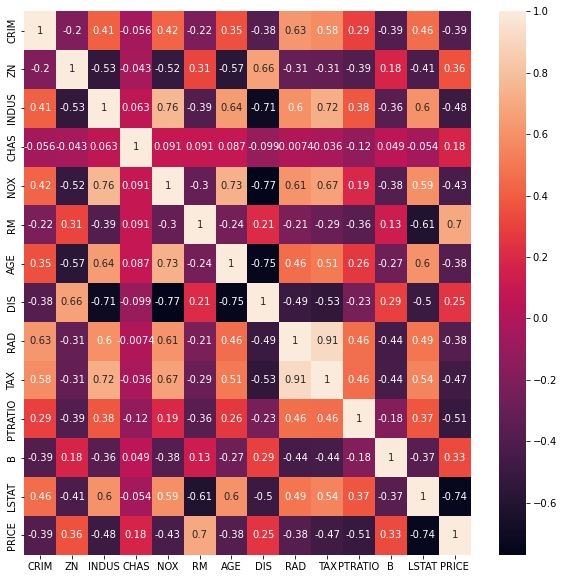

In [12]:
import seaborn as sns

df = house_df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(df, annot=True)

In [13]:
house_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [17]:
a = abs(df.PRICE)
a.sort_values(ascending=False)[1:9]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
Name: PRICE, dtype: float64

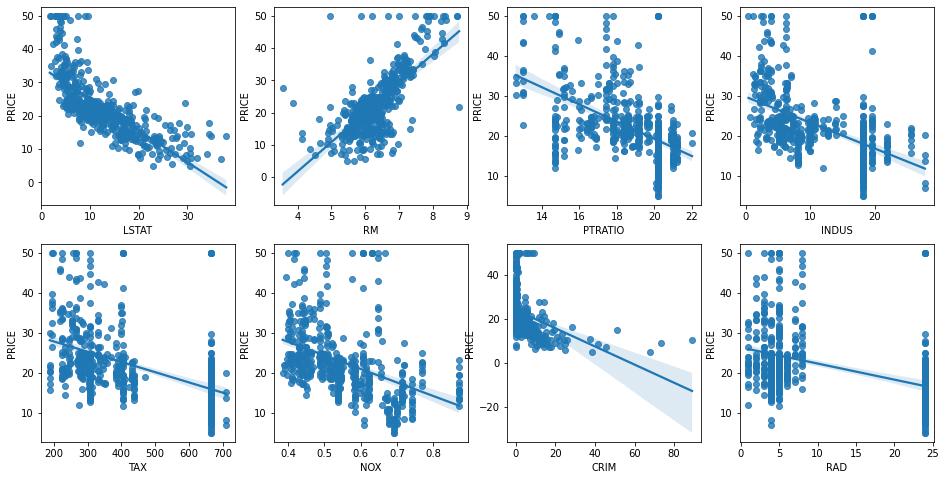

In [18]:
# 상위 8개 피처 상관관계 확인
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE',data=house_df, ax=axs[row][col])

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

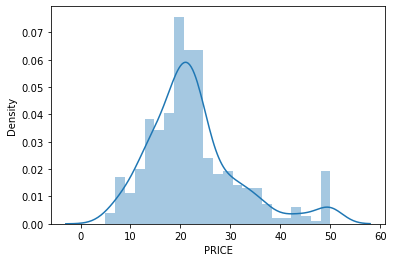

In [19]:
# 종속변수의 분포도

sns.distplot(house_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

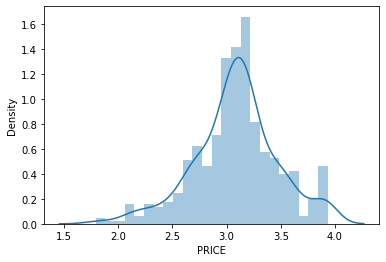

In [21]:
y_log = np.log1p(house_df['PRICE'])
sns.distplot(y_log)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = house_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']]
y = house_df[['PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse:.4f}, RMSE : {rmse:.4f}, R2 : {r2:.4f}')
print(f'절편값 : {np.round(lr.intercept_)}')
print(f'회귀 계수 값 : {lr.coef_}')

MSE : 24.3526, RMSE : 4.9348, R2 : 0.7343
절편값 : [36.]
회귀 계수 값 : [[ -0.56945327   3.33668178  -1.13719722   0.16129006  -0.01126136
  -10.32433655  -0.08113708   0.29009019]]


#### 과제_0926_1

상기 내용에 대하여 교차 검증을 수행하여 평가 결과를 출력하세요. (cv=5)

In [ ]:
from sklearn.model_selection import cross_val_score

